# Networks with Plotly

##### ABOUT THE AUTHOR:
This notebook was contributed by [Plotly user Emilia Petrisor](https://plot.ly/~empet).  You can follow Emilia on Twitter [@mathinpython](https://twitter.com/mathinpython) or [Github](https://github.com/empet).

In this notebook we illustrate how to generate planar graphs/networks in Plotly, defined as `Graph` objects 
in [`networkx`](https://networkx.github.io/). 
The Plotly  objects defined in this notebook have some attributes introduced only starting with  the Plotly 1.8.6.

### Planar graphs defined by the lists of nodes and edges

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
G=nx.Graph()#  G is an empty Graph

In [3]:
Nodes=range(9)
G.add_nodes_from(Nodes)
Edges=[(0,1), (0,2), (1,3), (1,4), (1,7), (2,5), (2,8), (3, 4), (3,5),(4,6), (4,7), (4,8), (5,7)]
G.add_edges_from(Edges)
G.add_edge(6,8)

Matplotlib plot of the graph:

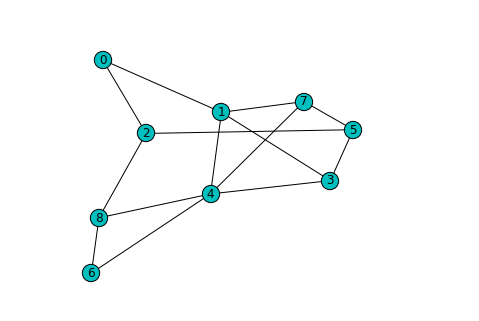

In [4]:
nx.draw(G, node_color='c',edge_color='k', with_labels=True)

Graphs are drawn using various layouts. The default layout is `spring_layout`. Other common layouts are
`spectral_layout`,  `fruchterman_reingold_layout` (for more details see 
[here](https://networkx.github.io/documentation/latest/_modules/networkx/drawing/layout.html)). 

In order to plot a `Graph` with Python Plotly we extract the node positions calling the layout function, `nx.name_layout(G)`.

Position is a dictionary having as keys the node indices and as values the coordinates assigned to nodes by the layout  algorithm:

In [5]:
pos1=nx.spring_layout(G)
print pos1

{0: array([-0.05671577,  1.        ]), 1: array([-0.4171025 ,  0.35671279]), 2: array([ 0.35305644,  0.45109182]), 3: array([-0.01895934,  0.00274314]), 4: array([-0.01099668, -0.43858695]), 5: array([-0.36114882,  0.08563398]), 6: array([ 0.57519941, -0.90731289]), 7: array([-0.71832797, -0.25380766]), 8: array([ 0.65499523, -0.29647422])}


In [6]:
pos2=nx.spectral_layout(G)
print pos2

{0: array([-0.57374783,  0.88974609]), 1: array([-0.27562162, -0.18274255]), 2: array([-0.18696238,  0.57932286]), 3: array([-0.214468  , -0.54244963]), 4: array([ 0.22922073, -0.25178448]), 5: array([-0.34098186, -0.34970489]), 6: array([ 1.        ,  0.10256305]), 7: array([-0.214468  , -0.54244963]), 8: array([ 0.57702895,  0.29749919])}


Spring layout and Fruchterman Reingold layout algorithms start with a random positions of nodes. That is why two consecutive calls of the  corresponding functions return different node positions for the same graph.

To illustrate non-uniqueness of positions  we call again the  function `nx.spring_layout()` for G:

In [7]:
pos3=nx.spring_layout(G)
print pos3

{0: array([ 0.64676492, -1.33328739]), 1: array([ 0.3625917 , -0.05774536]), 2: array([-0.07580464, -0.93062454]), 3: array([ 0.88192863,  0.66294401]), 4: array([-0.43248626,  0.57345652]), 5: array([ 1.        , -0.12469837]), 6: array([-1.62251131,  0.59952911]), 7: array([ 0.37185019,  0.84431659]), 8: array([-1.13233324, -0.23389057])}


Spectral layout algorithm returns a unique  position, at each call, for a given graph.


 The Plotly plot of a graph involves the `Graph` nodes and edges,  node positions associated by a chosen layout function, and  the attributes of nodes and   edges  defined as Plotly `Scatter` traces of type (mode) marker, respectively line. 


In [8]:
import plotly.plotly as py
from plotly.graph_objs import *

The function `scatter_nodes` sets the position of nodes and their attributes:

In [9]:
def scatter_nodes(pos, labels=None, color=None, size=20, opacity=1):
    # pos is the dict of node positions
    # labels is a list  of labels of len(pos), to be displayed when hovering the mouse over the nodes
    # color is the color for nodes. When it is set as None the Plotly default color is used
    # size is the size of the dots representing the nodes
    #opacity is a value between [0,1] defining the node color opacity
    L=len(pos)
    trace = Scatter(x=[], y=[],  mode='markers', marker=Marker(size=[]))
    for k in range(L):
        trace['x'].append(pos[k][0])
        trace['y'].append(pos[k][1])
    attrib=dict(name='', text=labels , hoverinfo='text', opacity=opacity) # a dict of Plotly node attributes
    trace=dict(trace, **attrib)# concatenate the dict trace and attrib
    trace['marker']['size']=size
    return trace       

Plotly displays the coordinates of the nodes by default. Because these coordinates have no relevance in the network analysis
we hide them  setting `hoverinfo` as 'text', i.e. in the function above with node labels.

The function `scatter_edges` defines the Graph edges as a Scatter Plotly trace of `mode`='lines'. 

`hoverinfo` is set  as 'none', because otherwise hovering the mouse over the points of coordinates $(x,y)$, i.e. over nodes, are displayed
by default the node coordinates.

In [10]:
def scatter_edges(G, pos, line_color=None, line_width=1):
    trace = Scatter(x=[], y=[], mode='lines')
    for edge in G.edges():
        trace['x'] += [pos[edge[0]][0],pos[edge[1]][0], None]
        trace['y'] += [pos[edge[0]][1],pos[edge[1]][1], None]  
        trace['hoverinfo']='none'
        trace['line']['width']=line_width
        if line_color is not None: # when it is None a default Plotly color is used
            trace['line']['color']=line_color
    return trace            

Let us plot the `Graph`, $G$,  defined above using node positions assigned by Fruchterman Reingold layout algorithm:

In [11]:
pos=nx.fruchterman_reingold_layout(G)   

In [12]:
labels=[str(k)  for k in range(len(pos))] # labels are  set as being the nodes indices in the list of nodes
trace1=scatter_edges(G, pos)
trace2=scatter_nodes(pos, labels=labels)

Settings for Plotly layout of the plot:

In [13]:
width=500
height=500
axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title='' 
          )
layout=Layout(title= 'Fruchterman Reingold  layout',  #
    font= Font(),
    showlegend=False,
    autosize=False,
    width=width,
    height=height,
    xaxis=XAxis(axis),
    yaxis=YAxis(axis),
    margin=Margin(
        l=40,
        r=40,
        b=85,
        t=100,
        pad=0,
       
    ),
    hovermode='closest',
    plot_bgcolor='#EFECEA', #set background color            
    )


data=Data([trace1, trace2])

fig = Figure(data=data, layout=layout)



To get  a good looking  graph it is recommended to define data as a list having  the first element the trace corresponding to edges, 
and the second the trace for
 nodes. Otherwise the lines will be traced over  the node dots.

If we want to annotate the nodes  we should update the layout with the corresponding annotations. The function below defines the annotations:

In [14]:
def make_annotations(pos, text, font_size=14, font_color='rgb(25,25,25)'):
    L=len(pos)
    if len(text)!=L:
        raise ValueError('The lists pos and text must have the same len')
    annotations = Annotations()
    for k in range(L):
        annotations.append(
            Annotation(
                text=text[k], 
                x=pos[k][0], y=pos[k][1],
                xref='x1', yref='y1',
                font=dict(color= font_color, size=font_size),
                showarrow=False)
        )
    return annotations  

In [15]:
fig['layout'].update(annotations=make_annotations(pos, [str(k) for k in range(len(pos))]))  
py.sign_in('', '')
py.iplot(fig, filename='tst')

## Network defined by adjacency matrix ##

In [16]:
import numpy as np

List of nodes:
[0, 1, 2, 3, 4, 5, 6, 7] 
List of edges:
[(0, 1), (0, 2), (0, 3), (0, 7), (1, 2), (1, 4), (1, 5), (1, 6), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (3, 7), (4, 5), (4, 6), (5, 6), (6, 7)]


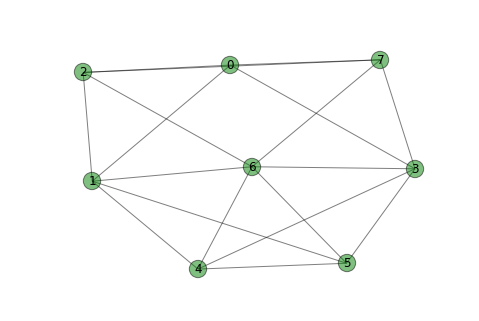

In [17]:
Ad=np.array([[0,1,1,1,0,0,0,1], # Adjacency matrix
             [1,0,1,0,1,1,1,0],
             [1,1,0,0,0,0,1,1],
             [1,0,0,0,1,1,1,1],
             [0,1,0,1,0,1,1,0],
             [0,1,0,1,1,0,1,0],
             [0,1,1,1,1,1,0,1],
             [1,0,1,1,0,0,1,0]], dtype=float)
Gr=nx.from_numpy_matrix(Ad)
print 'List of nodes:\n', Gr.nodes(), '\n', 'List of edges:\n', Gr.edges()
nx.draw(Gr, node_color='g', with_labels=True, alpha=0.5)#matplotlib plot of the graph Gr


In [18]:
position=nx.spring_layout(Gr)

Interpreting the graph as a frienship graph, we set its labels (displayed when hovering over the nodes) 
as being the friends names:

In [19]:
labels=['Fred', 'Alice', 'Bob', 'Anna', 'Frida', 'Andrew', 'Jack', 'Maria']

In [20]:
traceE=scatter_edges(Gr, position)
traceN=scatter_nodes(position, labels=labels)

Now we update the above  layout of the plot with information on the new graph:

In [21]:
layout.update(title='Friendship Network')
data1=Data([traceE, traceN])
fig = Figure(data=data1, layout=layout)
fig['layout'].update(annotations=make_annotations(position, [str(k) for k in range(len(position))]))  
py.iplot(fig, filename='Network-2N')

In [22]:
! pip install publisher --upgrade

from IPython.display import HTML, display

display(HTML('<link href="//fonts.googleapis.com/css?family=Open+Sans:600,400,300,200|Inconsolata|Ubuntu+Mono:400,700" rel="stylesheet" type="text/css" />'))
display(HTML('<link rel="stylesheet" type="text/css" href="https://help.plot.ly/documentation/all_static/css/ipython-notebook-custom.css">'))

import publisher
publisher.publish('Networks-plotly', '/ipython-notebooks/networks/', 
                  'Network Graphs', 
                  'How to make network graphs with Python and Plotly graphs.')

You are using pip version 7.1.0, however version 7.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already up-to-date: publisher in /Users/Chelsea/venv2.7/lib/python2.7/site-packages


/Users/Chelsea/venv2.7/lib/python2.7/site-packages/publisher/publisher.py:53: UserWarning:

Did you "Save" this notebook before running this command? Remember to save, always save.

/Users/Chelsea/venv2.7/lib/python2.7/site-packages/publisher/publisher.py:58: UserWarning:

Your URL has more than 2 parts... are you sure?

